In [1]:
# import modules
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, InputLayer
from keras.regularizers import L1L2

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# to stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [3]:
# set path
data_dir = os.path.abspath('../Data')

In [4]:
# load data
train = pd.read_csv(os.path.join(data_dir, 'lfw_grayscale_32.csv'))
train_x = train.iloc[:,1:].values.astype('float32')/255

In [5]:
train_x = train_x.reshape(-1,32,32)

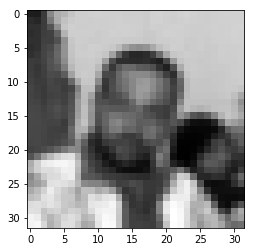

In [6]:
pylab.imshow(train_x[15],cmap="gray")
pylab.show()

In [7]:
# define vars
g_input_shape = 100
d_input_shape = (32, 32)
hidden_1_num_units = 600
hidden_2_num_units = 600
g_output_num_units = 1024
d_output_num_units = 1
epochs = 2000
batch_size = 128

In [8]:
# generator
model_1 = Sequential([
    Dense(units=hidden_1_num_units, input_dim=g_input_shape, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),

    Dense(units=hidden_2_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),
        
    Dense(units=g_output_num_units, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)),
    
    Reshape(d_input_shape),
])

# discriminator
model_2 = Sequential([
    InputLayer(input_shape=d_input_shape),
    
    Flatten(),
        
    Dense(units=hidden_1_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),

    Dense(units=hidden_2_num_units, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)),
        
    Dense(units=d_output_num_units, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)),
])

In [9]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               60600     
_________________________________________________________________
dense_2 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              615424    
_________________________________________________________________
reshape_1 (Reshape)          (None, 32, 32)            0         
Total params: 1,036,624
Trainable params: 1,036,624
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 600)               615000    
_________________________________________________________________
dense_5 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 601       
Total params: 976,201
Trainable params: 976,201
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import AdversarialOptimizerSimultaneous, normal_latent_sampling

In [12]:
gan = simple_gan(model_1, model_2, normal_latent_sampling((100,)))
model = AdversarialModel(base_model=gan,player_params=[model_1.trainable_weights, model_2.trainable_weights])
model.adversarial_compile(adversarial_optimizer=AdversarialOptimizerSimultaneous(), player_optimizers=['adam', 'adam'], loss='binary_crossentropy')

history = model.fit(x=train_x, y=gan_targets(train_x.shape[0]), epochs=epochs, batch_size=batch_size)

Epoch 1/2000
13232/13232 [==============================] - 13s 969us/step - loss: 25.3453 - player_0_loss: 20.6530 - player_0_yfake_loss: 8.0395 - player_0_yreal_loss: 8.2177 - player_1_loss: 4.6923 - player_1_yfake_loss: 0.1603 - player_1_yreal_loss: 0.1362
Epoch 2/2000
13232/13232 [==============================] - 6s 486us/step - loss: 38.3719 - player_0_loss: 35.1408 - player_0_yfake_loss: 16.1181 - player_0_yreal_loss: 15.7916 - player_1_loss: 3.2311 - player_1_yfake_loss: 1.0000e-07 - player_1_yreal_loss: 1.1907e-05
Epoch 3/2000
13232/13232 [==============================] - 6s 486us/step - loss: 36.1643 - player_0_loss: 33.5646 - player_0_yfake_loss: 16.1181 - player_0_yreal_loss: 14.8473 - player_1_loss: 2.5996 - player_1_yfake_loss: 1.0000e-07 - player_1_yreal_loss: 3.3715e-04
Epoch 4/2000
13232/13232 [==============================] - 6s 486us/step - loss: 34.4283 - player_0_loss: 32.3069 - player_0_yfake_loss: 16.1181 - player_0_yreal_loss: 14.0676 - player_1_loss: 2.1214 -

13232/13232 [==============================] - 6s 486us/step - loss: 14.1413 - player_0_loss: 12.4171 - player_0_yfake_loss: 3.1934 - player_0_yreal_loss: 7.9238 - player_1_loss: 1.7242 - player_1_yfake_loss: 0.1658 - player_1_yreal_loss: 0.2585
Epoch 33/2000
13232/13232 [==============================] - 6s 487us/step - loss: 11.9444 - player_0_loss: 10.0143 - player_0_yfake_loss: 2.6709 - player_0_yreal_loss: 6.0553 - player_1_loss: 1.9302 - player_1_yfake_loss: 0.2643 - player_1_yreal_loss: 0.3778
Epoch 34/2000
13232/13232 [==============================] - 6s 487us/step - loss: 13.2059 - player_0_loss: 11.5507 - player_0_yfake_loss: 2.9267 - player_0_yreal_loss: 7.3358 - player_1_loss: 1.6553 - player_1_yfake_loss: 0.1413 - player_1_yreal_loss: 0.2258
Epoch 35/2000
13232/13232 [==============================] - 7s 495us/step - loss: 13.3615 - player_0_loss: 11.6961 - player_0_yfake_loss: 3.1774 - player_0_yreal_loss: 7.2268 - player_1_loss: 1.6654 - player_1_yfake_loss: 0.1418 - pl

13232/13232 [==============================] - 6s 486us/step - loss: 12.4082 - player_0_loss: 10.5898 - player_0_yfake_loss: 3.3699 - player_0_yreal_loss: 5.8534 - player_1_loss: 1.8184 - player_1_yfake_loss: 0.1928 - player_1_yreal_loss: 0.2590
Epoch 64/2000
13232/13232 [==============================] - 6s 486us/step - loss: 13.6755 - player_0_loss: 11.9848 - player_0_yfake_loss: 3.5543 - player_0_yreal_loss: 7.0631 - player_1_loss: 1.6908 - player_1_yfake_loss: 0.1376 - player_1_yreal_loss: 0.1859
Epoch 65/2000
13232/13232 [==============================] - 6s 487us/step - loss: 13.3497 - player_0_loss: 11.5273 - player_0_yfake_loss: 3.3920 - player_0_yreal_loss: 6.7702 - player_1_loss: 1.8224 - player_1_yfake_loss: 0.2006 - player_1_yreal_loss: 0.2568
Epoch 66/2000
13232/13232 [==============================] - 6s 486us/step - loss: 12.5558 - player_0_loss: 10.7775 - player_0_yfake_loss: 2.9364 - player_0_yreal_loss: 6.4765 - player_1_loss: 1.7783 - player_1_yfake_loss: 0.1741 - pl

13232/13232 [==============================] - 6s 485us/step - loss: 11.5602 - player_0_loss: 9.6545 - player_0_yfake_loss: 3.3502 - player_0_yreal_loss: 4.8308 - player_1_loss: 1.9057 - player_1_yfake_loss: 0.1938 - player_1_yreal_loss: 0.2385
Epoch 94/2000
13232/13232 [==============================] - 6s 488us/step - loss: 12.6484 - player_0_loss: 10.5925 - player_0_yfake_loss: 3.6273 - player_0_yreal_loss: 5.4790 - player_1_loss: 2.0559 - player_1_yfake_loss: 0.2601 - player_1_yreal_loss: 0.3096
Epoch 95/2000
13232/13232 [==============================] - 6s 485us/step - loss: 12.4660 - player_0_loss: 10.5339 - player_0_yfake_loss: 3.6449 - player_0_yreal_loss: 5.3808 - player_1_loss: 1.9321 - player_1_yfake_loss: 0.1926 - player_1_yreal_loss: 0.2313
Epoch 96/2000
13232/13232 [==============================] - 6s 485us/step - loss: 14.3230 - player_0_loss: 12.3596 - player_0_yfake_loss: 4.2518 - player_0_yreal_loss: 6.5848 - player_1_loss: 1.9634 - player_1_yfake_loss: 0.2004 - pla

13232/13232 [==============================] - 6s 486us/step - loss: 11.9320 - player_0_loss: 9.9906 - player_0_yfake_loss: 3.4114 - player_0_yreal_loss: 5.0127 - player_1_loss: 1.9414 - player_1_yfake_loss: 0.1802 - player_1_yreal_loss: 0.1947
Epoch 124/2000
13232/13232 [==============================] - 6s 487us/step - loss: 10.9899 - player_0_loss: 8.9608 - player_0_yfake_loss: 2.8278 - player_0_yreal_loss: 4.5716 - player_1_loss: 2.0291 - player_1_yfake_loss: 0.2161 - player_1_yreal_loss: 0.2516
Epoch 125/2000
13232/13232 [==============================] - 6s 486us/step - loss: 10.4863 - player_0_loss: 8.3985 - player_0_yfake_loss: 2.6973 - player_0_yreal_loss: 4.1426 - player_1_loss: 2.0879 - player_1_yfake_loss: 0.2390 - player_1_yreal_loss: 0.2903
Epoch 126/2000
13232/13232 [==============================] - 6s 485us/step - loss: 10.6693 - player_0_loss: 8.4951 - player_0_yfake_loss: 2.9676 - player_0_yreal_loss: 3.9615 - player_1_loss: 2.1743 - player_1_yfake_loss: 0.2889 - pla

13232/13232 [==============================] - 6s 488us/step - loss: 9.3236 - player_0_loss: 7.0616 - player_0_yfake_loss: 2.1149 - player_0_yreal_loss: 3.3948 - player_1_loss: 2.2620 - player_1_yfake_loss: 0.3245 - player_1_yreal_loss: 0.3856
Epoch 155/2000
13232/13232 [==============================] - 6s 486us/step - loss: 10.2149 - player_0_loss: 8.1457 - player_0_yfake_loss: 2.5223 - player_0_yreal_loss: 4.0787 - player_1_loss: 2.0692 - player_1_yfake_loss: 0.2420 - player_1_yreal_loss: 0.2825
Epoch 156/2000
13232/13232 [==============================] - 6s 485us/step - loss: 11.3690 - player_0_loss: 9.1671 - player_0_yfake_loss: 3.0929 - player_0_yreal_loss: 4.5236 - player_1_loss: 2.2019 - player_1_yfake_loss: 0.3034 - player_1_yreal_loss: 0.3478
Epoch 157/2000
13232/13232 [==============================] - 6s 485us/step - loss: 9.9175 - player_0_loss: 7.6830 - player_0_yfake_loss: 2.4594 - player_0_yreal_loss: 3.6722 - player_1_loss: 2.2345 - player_1_yfake_loss: 0.3170 - playe

13232/13232 [==============================] - 6s 486us/step - loss: 9.6197 - player_0_loss: 7.4030 - player_0_yfake_loss: 2.4587 - player_0_yreal_loss: 3.4153 - player_1_loss: 2.2167 - player_1_yfake_loss: 0.3345 - player_1_yreal_loss: 0.3531
Epoch 186/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.6617 - player_0_loss: 7.5030 - player_0_yfake_loss: 2.5680 - player_0_yreal_loss: 3.4037 - player_1_loss: 2.1588 - player_1_yfake_loss: 0.2890 - player_1_yreal_loss: 0.3385
Epoch 187/2000
13232/13232 [==============================] - 6s 487us/step - loss: 10.5742 - player_0_loss: 8.3293 - player_0_yfake_loss: 2.8525 - player_0_yreal_loss: 3.9427 - player_1_loss: 2.2449 - player_1_yfake_loss: 0.3361 - player_1_yreal_loss: 0.3747
Epoch 188/2000
13232/13232 [==============================] - 6s 485us/step - loss: 9.4878 - player_0_loss: 7.3666 - player_0_yfake_loss: 2.4750 - player_0_yreal_loss: 3.3565 - player_1_loss: 2.1211 - player_1_yfake_loss: 0.2754 - player

13232/13232 [==============================] - 8s 588us/step - loss: 9.3863 - player_0_loss: 6.9521 - player_0_yfake_loss: 2.3210 - player_0_yreal_loss: 3.0181 - player_1_loss: 2.4342 - player_1_yfake_loss: 0.3985 - player_1_yreal_loss: 0.4226
Epoch 216/2000
13232/13232 [==============================] - 8s 577us/step - loss: 8.8786 - player_0_loss: 6.3863 - player_0_yfake_loss: 2.1539 - player_0_yreal_loss: 2.6151 - player_1_loss: 2.4923 - player_1_yfake_loss: 0.4340 - player_1_yreal_loss: 0.4410
Epoch 217/2000
13232/13232 [==============================] - 8s 589us/step - loss: 8.9926 - player_0_loss: 6.5964 - player_0_yfake_loss: 2.2539 - player_0_yreal_loss: 2.7251 - player_1_loss: 2.3963 - player_1_yfake_loss: 0.3794 - player_1_yreal_loss: 0.3995
Epoch 218/2000
13232/13232 [==============================] - 6s 491us/step - loss: 10.3857 - player_0_loss: 7.7242 - player_0_yfake_loss: 2.7382 - player_0_yreal_loss: 3.3595 - player_1_loss: 2.6615 - player_1_yfake_loss: 0.5172 - player

13232/13232 [==============================] - 6s 488us/step - loss: 9.2810 - player_0_loss: 6.9216 - player_0_yfake_loss: 2.2812 - player_0_yreal_loss: 3.0327 - player_1_loss: 2.3594 - player_1_yfake_loss: 0.3719 - player_1_yreal_loss: 0.3798
Epoch 247/2000
13232/13232 [==============================] - 7s 493us/step - loss: 9.4340 - player_0_loss: 7.0208 - player_0_yfake_loss: 2.4322 - player_0_yreal_loss: 2.9824 - player_1_loss: 2.4132 - player_1_yfake_loss: 0.3732 - player_1_yreal_loss: 0.4339
Epoch 248/2000
13232/13232 [==============================] - 7s 491us/step - loss: 9.7245 - player_0_loss: 7.5122 - player_0_yfake_loss: 2.5257 - player_0_yreal_loss: 3.3835 - player_1_loss: 2.2123 - player_1_yfake_loss: 0.2913 - player_1_yreal_loss: 0.3179
Epoch 249/2000
13232/13232 [==============================] - 6s 488us/step - loss: 9.3597 - player_0_loss: 7.0828 - player_0_yfake_loss: 2.4064 - player_0_yreal_loss: 3.0829 - player_1_loss: 2.2769 - player_1_yfake_loss: 0.3333 - player_

13232/13232 [==============================] - 6s 486us/step - loss: 9.0979 - player_0_loss: 6.5694 - player_0_yfake_loss: 2.2266 - player_0_yreal_loss: 2.7638 - player_1_loss: 2.5285 - player_1_yfake_loss: 0.4628 - player_1_yreal_loss: 0.4868
Epoch 277/2000
13232/13232 [==============================] - 6s 487us/step - loss: 8.6566 - player_0_loss: 6.3848 - player_0_yfake_loss: 2.0625 - player_0_yreal_loss: 2.7495 - player_1_loss: 2.2719 - player_1_yfake_loss: 0.3568 - player_1_yreal_loss: 0.3423
Epoch 278/2000
13232/13232 [==============================] - 6s 487us/step - loss: 8.8795 - player_0_loss: 6.2772 - player_0_yfake_loss: 2.1228 - player_0_yreal_loss: 2.5794 - player_1_loss: 2.6023 - player_1_yfake_loss: 0.4991 - player_1_yreal_loss: 0.5282
Epoch 279/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.7151 - player_0_loss: 6.4500 - player_0_yfake_loss: 2.1390 - player_0_yreal_loss: 2.7380 - player_1_loss: 2.2652 - player_1_yfake_loss: 0.3312 - player_

13232/13232 [==============================] - 6s 486us/step - loss: 10.0709 - player_0_loss: 7.0887 - player_0_yfake_loss: 2.6069 - player_0_yreal_loss: 2.8263 - player_1_loss: 2.9822 - player_1_yfake_loss: 0.6482 - player_1_yreal_loss: 0.6784
Epoch 308/2000
13232/13232 [==============================] - 6s 487us/step - loss: 11.3032 - player_0_loss: 8.8822 - player_0_yfake_loss: 3.8453 - player_0_yreal_loss: 3.3460 - player_1_loss: 2.4211 - player_1_yfake_loss: 0.3695 - player_1_yreal_loss: 0.3607
Epoch 309/2000
13232/13232 [==============================] - 6s 486us/step - loss: 10.5900 - player_0_loss: 8.0538 - player_0_yfake_loss: 2.9762 - player_0_yreal_loss: 3.3724 - player_1_loss: 2.5362 - player_1_yfake_loss: 0.4267 - player_1_yreal_loss: 0.4043
Epoch 310/2000
13232/13232 [==============================] - 6s 488us/step - loss: 12.1768 - player_0_loss: 9.6833 - player_0_yfake_loss: 3.4637 - player_0_yreal_loss: 4.5015 - player_1_loss: 2.4935 - player_1_yfake_loss: 0.3844 - pla

13232/13232 [==============================] - 6s 487us/step - loss: 9.1240 - player_0_loss: 6.5119 - player_0_yfake_loss: 2.2552 - player_0_yreal_loss: 2.6450 - player_1_loss: 2.6121 - player_1_yfake_loss: 0.4752 - player_1_yreal_loss: 0.5252
Epoch 339/2000
13232/13232 [==============================] - 6s 487us/step - loss: 8.5496 - player_0_loss: 6.2347 - player_0_yfake_loss: 2.0509 - player_0_yreal_loss: 2.5766 - player_1_loss: 2.3149 - player_1_yfake_loss: 0.3629 - player_1_yreal_loss: 0.3448
Epoch 340/2000
13232/13232 [==============================] - 6s 487us/step - loss: 7.7870 - player_0_loss: 5.3112 - player_0_yfake_loss: 1.6399 - player_0_yreal_loss: 2.0751 - player_1_loss: 2.4758 - player_1_yfake_loss: 0.4409 - player_1_yreal_loss: 0.4388
Epoch 341/2000
13232/13232 [==============================] - 6s 488us/step - loss: 8.2181 - player_0_loss: 5.9406 - player_0_yfake_loss: 1.9271 - player_0_yreal_loss: 2.4268 - player_1_loss: 2.2776 - player_1_yfake_loss: 0.3401 - player_

13232/13232 [==============================] - 7s 499us/step - loss: 9.9264 - player_0_loss: 7.6825 - player_0_yfake_loss: 2.6979 - player_0_yreal_loss: 3.4625 - player_1_loss: 2.2440 - player_1_yfake_loss: 0.3530 - player_1_yreal_loss: 0.3688
Epoch 370/2000
13232/13232 [==============================] - 7s 495us/step - loss: 9.5485 - player_0_loss: 7.3515 - player_0_yfake_loss: 2.8904 - player_0_yreal_loss: 2.9228 - player_1_loss: 2.1970 - player_1_yfake_loss: 0.3228 - player_1_yreal_loss: 0.3358
Epoch 371/2000
13232/13232 [==============================] - 6s 488us/step - loss: 9.0169 - player_0_loss: 6.5559 - player_0_yfake_loss: 2.4758 - player_0_yreal_loss: 2.5237 - player_1_loss: 2.4610 - player_1_yfake_loss: 0.4348 - player_1_yreal_loss: 0.4697
Epoch 372/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.7446 - player_0_loss: 6.4282 - player_0_yfake_loss: 2.1306 - player_0_yreal_loss: 2.7354 - player_1_loss: 2.3164 - player_1_yfake_loss: 0.3589 - player_

13232/13232 [==============================] - 6s 487us/step - loss: 10.1834 - player_0_loss: 7.5217 - player_0_yfake_loss: 2.3822 - player_0_yreal_loss: 3.4655 - player_1_loss: 2.6617 - player_1_yfake_loss: 0.4867 - player_1_yreal_loss: 0.5011
Epoch 401/2000
13232/13232 [==============================] - 6s 487us/step - loss: 11.2665 - player_0_loss: 8.8156 - player_0_yfake_loss: 3.0512 - player_0_yreal_loss: 4.0875 - player_1_loss: 2.4509 - player_1_yfake_loss: 0.3970 - player_1_yreal_loss: 0.3770
Epoch 402/2000
13232/13232 [==============================] - 6s 486us/step - loss: 12.1711 - player_0_loss: 9.5745 - player_0_yfake_loss: 3.5493 - player_0_yreal_loss: 4.3338 - player_1_loss: 2.5966 - player_1_yfake_loss: 0.4635 - player_1_yreal_loss: 0.4418
Epoch 403/2000
13232/13232 [==============================] - 6s 486us/step - loss: 11.6088 - player_0_loss: 9.0413 - player_0_yfake_loss: 2.9095 - player_0_yreal_loss: 4.4306 - player_1_loss: 2.5675 - player_1_yfake_loss: 0.4242 - pla

13232/13232 [==============================] - 6s 486us/step - loss: 9.0694 - player_0_loss: 6.7413 - player_0_yfake_loss: 2.3226 - player_0_yreal_loss: 2.7547 - player_1_loss: 2.3281 - player_1_yfake_loss: 0.3369 - player_1_yreal_loss: 0.3272
Epoch 432/2000
13232/13232 [==============================] - 6s 487us/step - loss: 9.0285 - player_0_loss: 6.5473 - player_0_yfake_loss: 2.0973 - player_0_yreal_loss: 2.7889 - player_1_loss: 2.4812 - player_1_yfake_loss: 0.3923 - player_1_yreal_loss: 0.4278
Epoch 433/2000
13232/13232 [==============================] - 6s 487us/step - loss: 9.0300 - player_0_loss: 6.4841 - player_0_yfake_loss: 2.0390 - player_0_yreal_loss: 2.7909 - player_1_loss: 2.5458 - player_1_yfake_loss: 0.4560 - player_1_yreal_loss: 0.4356
Epoch 434/2000
13232/13232 [==============================] - 6s 485us/step - loss: 8.4662 - player_0_loss: 6.1093 - player_0_yfake_loss: 1.8926 - player_0_yreal_loss: 2.5703 - player_1_loss: 2.3569 - player_1_yfake_loss: 0.3581 - player_

13232/13232 [==============================] - 6s 485us/step - loss: 8.4291 - player_0_loss: 5.8864 - player_0_yfake_loss: 1.8417 - player_0_yreal_loss: 2.4179 - player_1_loss: 2.5427 - player_1_yfake_loss: 0.4389 - player_1_yreal_loss: 0.4770
Epoch 463/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.9877 - player_0_loss: 6.5138 - player_0_yfake_loss: 2.2147 - player_0_yreal_loss: 2.6697 - player_1_loss: 2.4739 - player_1_yfake_loss: 0.4159 - player_1_yreal_loss: 0.4286
Epoch 464/2000
13232/13232 [==============================] - 6s 490us/step - loss: 8.5276 - player_0_loss: 6.1304 - player_0_yfake_loss: 2.0450 - player_0_yreal_loss: 2.4567 - player_1_loss: 2.3973 - player_1_yfake_loss: 0.3837 - player_1_yreal_loss: 0.3849
Epoch 465/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.2956 - player_0_loss: 6.9151 - player_0_yfake_loss: 2.3791 - player_0_yreal_loss: 2.9087 - player_1_loss: 2.3805 - player_1_yfake_loss: 0.3660 - player_

13232/13232 [==============================] - 7s 502us/step - loss: 11.1107 - player_0_loss: 8.6880 - player_0_yfake_loss: 2.8624 - player_0_yreal_loss: 4.1832 - player_1_loss: 2.4227 - player_1_yfake_loss: 0.3424 - player_1_yreal_loss: 0.4378
Epoch 494/2000
13232/13232 [==============================] - 7s 494us/step - loss: 11.4703 - player_0_loss: 8.9356 - player_0_yfake_loss: 3.3362 - player_0_yreal_loss: 3.9593 - player_1_loss: 2.5347 - player_1_yfake_loss: 0.4411 - player_1_yreal_loss: 0.4534
Epoch 495/2000
13232/13232 [==============================] - 7s 499us/step - loss: 8.7613 - player_0_loss: 6.3210 - player_0_yfake_loss: 2.0492 - player_0_yreal_loss: 2.6376 - player_1_loss: 2.4402 - player_1_yfake_loss: 0.3828 - player_1_yreal_loss: 0.4231
Epoch 496/2000
13232/13232 [==============================] - 7s 496us/step - loss: 9.3263 - player_0_loss: 7.0787 - player_0_yfake_loss: 2.5700 - player_0_yreal_loss: 2.8673 - player_1_loss: 2.2476 - player_1_yfake_loss: 0.3070 - playe

13232/13232 [==============================] - 6s 482us/step - loss: 7.8902 - player_0_loss: 5.2490 - player_0_yfake_loss: 1.6644 - player_0_yreal_loss: 1.9824 - player_1_loss: 2.6412 - player_1_yfake_loss: 0.5134 - player_1_yreal_loss: 0.5256
Epoch 525/2000
13232/13232 [==============================] - 6s 483us/step - loss: 8.3558 - player_0_loss: 6.0216 - player_0_yfake_loss: 2.0561 - player_0_yreal_loss: 2.3685 - player_1_loss: 2.3342 - player_1_yfake_loss: 0.3697 - player_1_yreal_loss: 0.3674
Epoch 526/2000
13232/13232 [==============================] - 6s 482us/step - loss: 7.7889 - player_0_loss: 5.2969 - player_0_yfake_loss: 1.6302 - player_0_yreal_loss: 2.0756 - player_1_loss: 2.4920 - player_1_yfake_loss: 0.4428 - player_1_yreal_loss: 0.4581
Epoch 527/2000
13232/13232 [==============================] - 6s 482us/step - loss: 8.3155 - player_0_loss: 6.0433 - player_0_yfake_loss: 2.0226 - player_0_yreal_loss: 2.4374 - player_1_loss: 2.2722 - player_1_yfake_loss: 0.3357 - player_

13232/13232 [==============================] - 6s 482us/step - loss: 8.5338 - player_0_loss: 6.0598 - player_0_yfake_loss: 1.9222 - player_0_yreal_loss: 2.5136 - player_1_loss: 2.4740 - player_1_yfake_loss: 0.4125 - player_1_yreal_loss: 0.4375
Epoch 556/2000
13232/13232 [==============================] - 6s 482us/step - loss: 8.0046 - player_0_loss: 5.4388 - player_0_yfake_loss: 1.5938 - player_0_yreal_loss: 2.2288 - player_1_loss: 2.5658 - player_1_yfake_loss: 0.4583 - player_1_yreal_loss: 0.4913
Epoch 557/2000
13232/13232 [==============================] - 6s 482us/step - loss: 7.7347 - player_0_loss: 5.1290 - player_0_yfake_loss: 1.5845 - player_0_yreal_loss: 1.9360 - player_1_loss: 2.6058 - player_1_yfake_loss: 0.4834 - player_1_yreal_loss: 0.5138
Epoch 558/2000
13232/13232 [==============================] - 6s 481us/step - loss: 8.0498 - player_0_loss: 5.5965 - player_0_yfake_loss: 1.7093 - player_0_yreal_loss: 2.2854 - player_1_loss: 2.4532 - player_1_yfake_loss: 0.4090 - player_

13232/13232 [==============================] - 6s 482us/step - loss: 8.4572 - player_0_loss: 5.9139 - player_0_yfake_loss: 1.8982 - player_0_yreal_loss: 2.4161 - player_1_loss: 2.5433 - player_1_yfake_loss: 0.4588 - player_1_yreal_loss: 0.4849
Epoch 587/2000
13232/13232 [==============================] - 6s 483us/step - loss: 8.2748 - player_0_loss: 5.9588 - player_0_yfake_loss: 1.9739 - player_0_yreal_loss: 2.3915 - player_1_loss: 2.3160 - player_1_yfake_loss: 0.3476 - player_1_yreal_loss: 0.3750
Epoch 588/2000
13232/13232 [==============================] - 6s 482us/step - loss: 8.1687 - player_0_loss: 5.8687 - player_0_yfake_loss: 1.9440 - player_0_yreal_loss: 2.3385 - player_1_loss: 2.2999 - player_1_yfake_loss: 0.3477 - player_1_yreal_loss: 0.3660
Epoch 589/2000
13232/13232 [==============================] - 6s 482us/step - loss: 8.1612 - player_0_loss: 5.7640 - player_0_yfake_loss: 1.8275 - player_0_yreal_loss: 2.3581 - player_1_loss: 2.3972 - player_1_yfake_loss: 0.3923 - player_

13232/13232 [==============================] - 6s 482us/step - loss: 10.1216 - player_0_loss: 7.7178 - player_0_yfake_loss: 2.8450 - player_0_yreal_loss: 3.2871 - player_1_loss: 2.4039 - player_1_yfake_loss: 0.4070 - player_1_yreal_loss: 0.4112
Epoch 618/2000
13232/13232 [==============================] - 6s 482us/step - loss: 11.2000 - player_0_loss: 8.6613 - player_0_yfake_loss: 3.6267 - player_0_yreal_loss: 3.4364 - player_1_loss: 2.5387 - player_1_yfake_loss: 0.5128 - player_1_yreal_loss: 0.4278
Epoch 619/2000
13232/13232 [==============================] - 6s 483us/step - loss: 8.8281 - player_0_loss: 6.3755 - player_0_yfake_loss: 2.1900 - player_0_yreal_loss: 2.5822 - player_1_loss: 2.4526 - player_1_yfake_loss: 0.4130 - player_1_yreal_loss: 0.4361
Epoch 620/2000
13232/13232 [==============================] - 6s 481us/step - loss: 7.9654 - player_0_loss: 5.3178 - player_0_yfake_loss: 1.5624 - player_0_yreal_loss: 2.1502 - player_1_loss: 2.6476 - player_1_yfake_loss: 0.5282 - playe

13232/13232 [==============================] - 6s 482us/step - loss: 8.2648 - player_0_loss: 5.7975 - player_0_yfake_loss: 2.0242 - player_0_yreal_loss: 2.1614 - player_1_loss: 2.4672 - player_1_yfake_loss: 0.4245 - player_1_yreal_loss: 0.4308
Epoch 649/2000
13232/13232 [==============================] - 6s 482us/step - loss: 7.7756 - player_0_loss: 5.4080 - player_0_yfake_loss: 1.7056 - player_0_yreal_loss: 2.0960 - player_1_loss: 2.3676 - player_1_yfake_loss: 0.3652 - player_1_yreal_loss: 0.3960
Epoch 650/2000
13232/13232 [==============================] - 6s 482us/step - loss: 7.5331 - player_0_loss: 5.0131 - player_0_yfake_loss: 1.5297 - player_0_yreal_loss: 1.8828 - player_1_loss: 2.5200 - player_1_yfake_loss: 0.4582 - player_1_yreal_loss: 0.4612
Epoch 651/2000
13232/13232 [==============================] - 6s 483us/step - loss: 7.9353 - player_0_loss: 5.4901 - player_0_yfake_loss: 1.7651 - player_0_yreal_loss: 2.1310 - player_1_loss: 2.4452 - player_1_yfake_loss: 0.4120 - player_

13232/13232 [==============================] - 6s 483us/step - loss: 9.9646 - player_0_loss: 7.3930 - player_0_yfake_loss: 2.3234 - player_0_yreal_loss: 3.4222 - player_1_loss: 2.5716 - player_1_yfake_loss: 0.4400 - player_1_yreal_loss: 0.4842
Epoch 680/2000
13232/13232 [==============================] - 6s 482us/step - loss: 10.8737 - player_0_loss: 8.4703 - player_0_yfake_loss: 2.8760 - player_0_yreal_loss: 3.9420 - player_1_loss: 2.4034 - player_1_yfake_loss: 0.3933 - player_1_yreal_loss: 0.3579
Epoch 681/2000
13232/13232 [==============================] - 6s 480us/step - loss: 11.0031 - player_0_loss: 8.6768 - player_0_yfake_loss: 2.5084 - player_0_yreal_loss: 4.5229 - player_1_loss: 2.3263 - player_1_yfake_loss: 0.3176 - player_1_yreal_loss: 0.3632
Epoch 682/2000
13232/13232 [==============================] - 6s 481us/step - loss: 10.3540 - player_0_loss: 7.7836 - player_0_yfake_loss: 2.3584 - player_0_yreal_loss: 3.7861 - player_1_loss: 2.5704 - player_1_yfake_loss: 0.4578 - play

13232/13232 [==============================] - 6s 481us/step - loss: 10.2157 - player_0_loss: 7.7027 - player_0_yfake_loss: 2.7744 - player_0_yreal_loss: 3.3147 - player_1_loss: 2.5130 - player_1_yfake_loss: 0.4581 - player_1_yreal_loss: 0.4413
Epoch 711/2000
13232/13232 [==============================] - 6s 481us/step - loss: 9.4105 - player_0_loss: 7.0689 - player_0_yfake_loss: 2.2849 - player_0_yreal_loss: 3.1736 - player_1_loss: 2.3415 - player_1_yfake_loss: 0.3576 - player_1_yreal_loss: 0.3736
Epoch 712/2000
13232/13232 [==============================] - 6s 480us/step - loss: 8.7042 - player_0_loss: 6.0676 - player_0_yfake_loss: 1.8314 - player_0_yreal_loss: 2.6279 - player_1_loss: 2.6367 - player_1_yfake_loss: 0.5187 - player_1_yreal_loss: 0.5097
Epoch 713/2000
13232/13232 [==============================] - 6s 480us/step - loss: 9.1757 - player_0_loss: 6.8364 - player_0_yfake_loss: 2.3122 - player_0_yreal_loss: 2.9086 - player_1_loss: 2.3393 - player_1_yfake_loss: 0.3528 - player

13232/13232 [==============================] - 6s 479us/step - loss: 10.0016 - player_0_loss: 7.4999 - player_0_yfake_loss: 2.6660 - player_0_yreal_loss: 3.2711 - player_1_loss: 2.5017 - player_1_yfake_loss: 0.4535 - player_1_yreal_loss: 0.4854
Epoch 742/2000
13232/13232 [==============================] - 6s 480us/step - loss: 11.3591 - player_0_loss: 8.5201 - player_0_yfake_loss: 3.1725 - player_0_yreal_loss: 3.7732 - player_1_loss: 2.8390 - player_1_yfake_loss: 0.6229 - player_1_yreal_loss: 0.6417
Epoch 743/2000
13232/13232 [==============================] - 6s 480us/step - loss: 10.0176 - player_0_loss: 7.4936 - player_0_yfake_loss: 2.4966 - player_0_yreal_loss: 3.4144 - player_1_loss: 2.5241 - player_1_yfake_loss: 0.4740 - player_1_yreal_loss: 0.4675
Epoch 744/2000
13232/13232 [==============================] - 6s 480us/step - loss: 9.4681 - player_0_loss: 6.9922 - player_0_yfake_loss: 2.3978 - player_0_yreal_loss: 3.0121 - player_1_loss: 2.4759 - player_1_yfake_loss: 0.4508 - play

13232/13232 [==============================] - 6s 480us/step - loss: 10.0842 - player_0_loss: 7.5039 - player_0_yfake_loss: 2.3107 - player_0_yreal_loss: 3.6036 - player_1_loss: 2.5803 - player_1_yfake_loss: 0.4549 - player_1_yreal_loss: 0.5358
Epoch 773/2000
13232/13232 [==============================] - 6s 480us/step - loss: 9.8662 - player_0_loss: 7.6472 - player_0_yfake_loss: 2.4222 - player_0_yreal_loss: 3.6388 - player_1_loss: 2.2190 - player_1_yfake_loss: 0.3030 - player_1_yreal_loss: 0.3299
Epoch 774/2000
13232/13232 [==============================] - 6s 481us/step - loss: 9.6052 - player_0_loss: 7.4184 - player_0_yfake_loss: 2.3397 - player_0_yreal_loss: 3.4982 - player_1_loss: 2.1868 - player_1_yfake_loss: 0.2932 - player_1_yreal_loss: 0.3131
Epoch 775/2000
13232/13232 [==============================] - 6s 481us/step - loss: 9.4062 - player_0_loss: 7.2046 - player_0_yfake_loss: 2.2480 - player_0_yreal_loss: 3.3774 - player_1_loss: 2.2016 - player_1_yfake_loss: 0.2874 - player

13232/13232 [==============================] - 6s 480us/step - loss: 10.3746 - player_0_loss: 8.2246 - player_0_yfake_loss: 2.6311 - player_0_yreal_loss: 4.0226 - player_1_loss: 2.1500 - player_1_yfake_loss: 0.2756 - player_1_yreal_loss: 0.3036
Epoch 804/2000
13232/13232 [==============================] - 6s 480us/step - loss: 9.9211 - player_0_loss: 7.3648 - player_0_yfake_loss: 2.3538 - player_0_yreal_loss: 3.4368 - player_1_loss: 2.5563 - player_1_yfake_loss: 0.4637 - player_1_yreal_loss: 0.5183
Epoch 805/2000
13232/13232 [==============================] - 6s 482us/step - loss: 12.6227 - player_0_loss: 9.8981 - player_0_yfake_loss: 3.3903 - player_0_yreal_loss: 4.9328 - player_1_loss: 2.7246 - player_1_yfake_loss: 0.6074 - player_1_yreal_loss: 0.5422
Epoch 806/2000
13232/13232 [==============================] - 6s 481us/step - loss: 11.7173 - player_0_loss: 9.4626 - player_0_yfake_loss: 3.4330 - player_0_yreal_loss: 4.4511 - player_1_loss: 2.2547 - player_1_yfake_loss: 0.3231 - play

13232/13232 [==============================] - 6s 481us/step - loss: 8.9262 - player_0_loss: 6.6432 - player_0_yfake_loss: 2.2883 - player_0_yreal_loss: 2.7749 - player_1_loss: 2.2829 - player_1_yfake_loss: 0.3530 - player_1_yreal_loss: 0.3498
Epoch 835/2000
13232/13232 [==============================] - 6s 480us/step - loss: 8.2676 - player_0_loss: 5.8890 - player_0_yfake_loss: 1.9855 - player_0_yreal_loss: 2.3290 - player_1_loss: 2.3786 - player_1_yfake_loss: 0.3955 - player_1_yreal_loss: 0.4086
Epoch 836/2000
13232/13232 [==============================] - 6s 480us/step - loss: 7.9694 - player_0_loss: 5.6909 - player_0_yfake_loss: 1.8480 - player_0_yreal_loss: 2.2753 - player_1_loss: 2.2784 - player_1_yfake_loss: 0.3535 - player_1_yreal_loss: 0.3573
Epoch 837/2000
13232/13232 [==============================] - 6s 480us/step - loss: 8.4133 - player_0_loss: 6.1722 - player_0_yfake_loss: 2.0514 - player_0_yreal_loss: 2.5597 - player_1_loss: 2.2411 - player_1_yfake_loss: 0.3298 - player_

13232/13232 [==============================] - 6s 480us/step - loss: 8.3395 - player_0_loss: 6.0721 - player_0_yfake_loss: 2.0805 - player_0_yreal_loss: 2.4840 - player_1_loss: 2.2673 - player_1_yfake_loss: 0.3600 - player_1_yreal_loss: 0.3997
Epoch 866/2000
13232/13232 [==============================] - 6s 480us/step - loss: 8.2234 - player_0_loss: 5.8570 - player_0_yfake_loss: 1.9477 - player_0_yreal_loss: 2.4011 - player_1_loss: 2.3664 - player_1_yfake_loss: 0.4263 - player_1_yreal_loss: 0.4318
Epoch 867/2000
13232/13232 [==============================] - 6s 480us/step - loss: 8.4902 - player_0_loss: 6.0624 - player_0_yfake_loss: 2.0036 - player_0_yreal_loss: 2.5493 - player_1_loss: 2.4277 - player_1_yfake_loss: 0.4546 - player_1_yreal_loss: 0.4636
Epoch 868/2000
13232/13232 [==============================] - 6s 480us/step - loss: 9.7453 - player_0_loss: 7.2884 - player_0_yfake_loss: 2.4191 - player_0_yreal_loss: 3.3606 - player_1_loss: 2.4569 - player_1_yfake_loss: 0.4692 - player_

13232/13232 [==============================] - 6s 486us/step - loss: 9.4361 - player_0_loss: 7.0910 - player_0_yfake_loss: 2.5611 - player_0_yreal_loss: 3.0230 - player_1_loss: 2.3450 - player_1_yfake_loss: 0.4005 - player_1_yreal_loss: 0.4376
Epoch 897/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.3021 - player_0_loss: 6.0305 - player_0_yfake_loss: 1.8173 - player_0_yreal_loss: 2.7094 - player_1_loss: 2.2716 - player_1_yfake_loss: 0.3721 - player_1_yreal_loss: 0.3957
Epoch 898/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.3335 - player_0_loss: 7.1646 - player_0_yfake_loss: 2.4403 - player_0_yreal_loss: 3.2241 - player_1_loss: 2.1690 - player_1_yfake_loss: 0.3299 - player_1_yreal_loss: 0.3389
Epoch 899/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.1970 - player_0_loss: 5.9057 - player_0_yfake_loss: 1.8850 - player_0_yreal_loss: 2.5246 - player_1_loss: 2.2914 - player_1_yfake_loss: 0.3772 - player_

13232/13232 [==============================] - 6s 486us/step - loss: 9.5531 - player_0_loss: 7.1150 - player_0_yfake_loss: 2.3706 - player_0_yreal_loss: 3.2337 - player_1_loss: 2.4380 - player_1_yfake_loss: 0.4415 - player_1_yreal_loss: 0.4858
Epoch 928/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.3149 - player_0_loss: 6.8978 - player_0_yfake_loss: 2.3510 - player_0_yreal_loss: 3.0372 - player_1_loss: 2.4172 - player_1_yfake_loss: 0.4112 - player_1_yreal_loss: 0.4965
Epoch 929/2000
13232/13232 [==============================] - 6s 485us/step - loss: 9.3161 - player_0_loss: 6.9232 - player_0_yfake_loss: 2.2983 - player_0_yreal_loss: 3.1168 - player_1_loss: 2.3929 - player_1_yfake_loss: 0.4362 - player_1_yreal_loss: 0.4486
Epoch 930/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.6053 - player_0_loss: 6.1703 - player_0_yfake_loss: 1.9236 - player_0_yreal_loss: 2.7390 - player_1_loss: 2.4350 - player_1_yfake_loss: 0.4595 - player_

13232/13232 [==============================] - 6s 486us/step - loss: 9.1407 - player_0_loss: 6.9538 - player_0_yfake_loss: 2.2243 - player_0_yreal_loss: 3.1625 - player_1_loss: 2.1869 - player_1_yfake_loss: 0.2966 - player_1_yreal_loss: 0.3232
Epoch 959/2000
13232/13232 [==============================] - 6s 485us/step - loss: 9.4547 - player_0_loss: 7.2076 - player_0_yfake_loss: 2.4655 - player_0_yreal_loss: 3.1729 - player_1_loss: 2.2471 - player_1_yfake_loss: 0.3178 - player_1_yreal_loss: 0.3602
Epoch 960/2000
13232/13232 [==============================] - 6s 485us/step - loss: 9.5507 - player_0_loss: 7.2517 - player_0_yfake_loss: 2.3116 - player_0_yreal_loss: 3.3759 - player_1_loss: 2.2991 - player_1_yfake_loss: 0.3574 - player_1_yreal_loss: 0.3775
Epoch 961/2000
13232/13232 [==============================] - 6s 485us/step - loss: 8.8870 - player_0_loss: 6.5802 - player_0_yfake_loss: 2.1103 - player_0_yreal_loss: 2.9099 - player_1_loss: 2.3068 - player_1_yfake_loss: 0.3522 - player_

13232/13232 [==============================] - 6s 486us/step - loss: 11.1868 - player_0_loss: 8.9165 - player_0_yfake_loss: 3.3784 - player_0_yreal_loss: 3.9555 - player_1_loss: 2.2703 - player_1_yfake_loss: 0.3421 - player_1_yreal_loss: 0.3457
Epoch 990/2000
13232/13232 [==============================] - 6s 485us/step - loss: 9.6919 - player_0_loss: 7.2980 - player_0_yfake_loss: 2.2548 - player_0_yreal_loss: 3.4559 - player_1_loss: 2.3940 - player_1_yfake_loss: 0.3999 - player_1_yreal_loss: 0.4067
Epoch 991/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.4256 - player_0_loss: 7.1989 - player_0_yfake_loss: 2.3464 - player_0_yreal_loss: 3.2620 - player_1_loss: 2.2267 - player_1_yfake_loss: 0.3120 - player_1_yreal_loss: 0.3241
Epoch 992/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.7420 - player_0_loss: 7.6067 - player_0_yfake_loss: 2.4797 - player_0_yreal_loss: 3.5357 - player_1_loss: 2.1354 - player_1_yfake_loss: 0.2590 - player

13232/13232 [==============================] - 6s 484us/step - loss: 10.6761 - player_0_loss: 8.6387 - player_0_yfake_loss: 3.0085 - player_0_yreal_loss: 4.1047 - player_1_loss: 2.0374 - player_1_yfake_loss: 0.2542 - player_1_yreal_loss: 0.2577
Epoch 1021/2000
13232/13232 [==============================] - 6s 482us/step - loss: 10.6143 - player_0_loss: 8.4790 - player_0_yfake_loss: 2.8059 - player_0_yreal_loss: 4.1477 - player_1_loss: 2.1353 - player_1_yfake_loss: 0.3026 - player_1_yreal_loss: 0.3073
Epoch 1022/2000
13232/13232 [==============================] - 6s 483us/step - loss: 10.1235 - player_0_loss: 7.9147 - player_0_yfake_loss: 2.7656 - player_0_yreal_loss: 3.6160 - player_1_loss: 2.2088 - player_1_yfake_loss: 0.3267 - player_1_yreal_loss: 0.3489
Epoch 1023/2000
13232/13232 [==============================] - 6s 482us/step - loss: 10.1394 - player_0_loss: 7.9055 - player_0_yfake_loss: 2.3802 - player_0_yreal_loss: 3.9956 - player_1_loss: 2.2340 - player_1_yfake_loss: 0.3257 - 

13232/13232 [==============================] - 6s 483us/step - loss: 9.1934 - player_0_loss: 6.7628 - player_0_yfake_loss: 2.1195 - player_0_yreal_loss: 3.1124 - player_1_loss: 2.4306 - player_1_yfake_loss: 0.4231 - player_1_yreal_loss: 0.4765
Epoch 1052/2000
13232/13232 [==============================] - 6s 482us/step - loss: 9.6602 - player_0_loss: 7.2470 - player_0_yfake_loss: 2.1462 - player_0_yreal_loss: 3.5744 - player_1_loss: 2.4133 - player_1_yfake_loss: 0.4063 - player_1_yreal_loss: 0.4806
Epoch 1053/2000
13232/13232 [==============================] - 6s 482us/step - loss: 10.5016 - player_0_loss: 8.2380 - player_0_yfake_loss: 2.6202 - player_0_yreal_loss: 4.0917 - player_1_loss: 2.2636 - player_1_yfake_loss: 0.3452 - player_1_yreal_loss: 0.3922
Epoch 1054/2000
13232/13232 [==============================] - 6s 482us/step - loss: 10.2607 - player_0_loss: 7.7461 - player_0_yfake_loss: 2.5270 - player_0_yreal_loss: 3.6919 - player_1_loss: 2.5146 - player_1_yfake_loss: 0.4621 - pl

13232/13232 [==============================] - 6s 482us/step - loss: 9.4289 - player_0_loss: 7.0380 - player_0_yfake_loss: 2.1148 - player_0_yreal_loss: 3.3571 - player_1_loss: 2.3910 - player_1_yfake_loss: 0.3766 - player_1_yreal_loss: 0.4484
Epoch 1083/2000
13232/13232 [==============================] - 6s 483us/step - loss: 10.1223 - player_0_loss: 7.9334 - player_0_yfake_loss: 2.5329 - player_0_yreal_loss: 3.8386 - player_1_loss: 2.1890 - player_1_yfake_loss: 0.2998 - player_1_yreal_loss: 0.3273
Epoch 1084/2000
13232/13232 [==============================] - 6s 482us/step - loss: 8.8085 - player_0_loss: 6.3744 - player_0_yfake_loss: 1.8753 - player_0_yreal_loss: 2.9411 - player_1_loss: 2.4341 - player_1_yfake_loss: 0.4025 - player_1_yreal_loss: 0.4736
Epoch 1085/2000
13232/13232 [==============================] - 6s 482us/step - loss: 8.9085 - player_0_loss: 6.4491 - player_0_yfake_loss: 2.1159 - player_0_yreal_loss: 2.7799 - player_1_loss: 2.4594 - player_1_yfake_loss: 0.4238 - pla

13232/13232 [==============================] - 6s 484us/step - loss: 8.2409 - player_0_loss: 5.7960 - player_0_yfake_loss: 1.8139 - player_0_yreal_loss: 2.4668 - player_1_loss: 2.4450 - player_1_yfake_loss: 0.4595 - player_1_yreal_loss: 0.4703
Epoch 1114/2000
13232/13232 [==============================] - 6s 483us/step - loss: 8.3976 - player_0_loss: 5.9245 - player_0_yfake_loss: 1.8753 - player_0_yreal_loss: 2.5377 - player_1_loss: 2.4732 - player_1_yfake_loss: 0.4566 - player_1_yreal_loss: 0.5050
Epoch 1115/2000
13232/13232 [==============================] - 6s 482us/step - loss: 8.8197 - player_0_loss: 6.5362 - player_0_yfake_loss: 2.3866 - player_0_yreal_loss: 2.6374 - player_1_loss: 2.2835 - player_1_yfake_loss: 0.3749 - player_1_yreal_loss: 0.3965
Epoch 1116/2000
13232/13232 [==============================] - 6s 482us/step - loss: 7.8583 - player_0_loss: 5.5513 - player_0_yfake_loss: 1.7562 - player_0_yreal_loss: 2.2831 - player_1_loss: 2.3070 - player_1_yfake_loss: 0.3831 - play

13232/13232 [==============================] - 7s 492us/step - loss: 10.2316 - player_0_loss: 8.0472 - player_0_yfake_loss: 3.0275 - player_0_yreal_loss: 3.4679 - player_1_loss: 2.1843 - player_1_yfake_loss: 0.2953 - player_1_yreal_loss: 0.3372
Epoch 1145/2000
13232/13232 [==============================] - 7s 506us/step - loss: 9.4521 - player_0_loss: 7.1678 - player_0_yfake_loss: 2.3129 - player_0_yreal_loss: 3.3045 - player_1_loss: 2.2843 - player_1_yfake_loss: 0.3585 - player_1_yreal_loss: 0.3754
Epoch 1146/2000
13232/13232 [==============================] - 7s 504us/step - loss: 10.2044 - player_0_loss: 8.0237 - player_0_yfake_loss: 2.8927 - player_0_yreal_loss: 3.5781 - player_1_loss: 2.1807 - player_1_yfake_loss: 0.3076 - player_1_yreal_loss: 0.3201
Epoch 1147/2000
13232/13232 [==============================] - 7s 493us/step - loss: 9.8578 - player_0_loss: 7.7045 - player_0_yfake_loss: 2.8091 - player_0_yreal_loss: 3.3452 - player_1_loss: 2.1533 - player_1_yfake_loss: 0.2926 - pl

13232/13232 [==============================] - 6s 482us/step - loss: 8.4513 - player_0_loss: 6.0208 - player_0_yfake_loss: 1.8748 - player_0_yreal_loss: 2.6229 - player_1_loss: 2.4305 - player_1_yfake_loss: 0.4415 - player_1_yreal_loss: 0.4658
Epoch 1176/2000
13232/13232 [==============================] - 6s 483us/step - loss: 9.1995 - player_0_loss: 6.9771 - player_0_yfake_loss: 2.2297 - player_0_yreal_loss: 3.2244 - player_1_loss: 2.2224 - player_1_yfake_loss: 0.3361 - player_1_yreal_loss: 0.3633
Epoch 1177/2000
13232/13232 [==============================] - 6s 482us/step - loss: 8.2788 - player_0_loss: 5.9523 - player_0_yfake_loss: 1.8757 - player_0_yreal_loss: 2.5530 - player_1_loss: 2.3265 - player_1_yfake_loss: 0.3782 - player_1_yreal_loss: 0.4247
Epoch 1178/2000
13232/13232 [==============================] - 6s 484us/step - loss: 8.0879 - player_0_loss: 5.6565 - player_0_yfake_loss: 1.7813 - player_0_yreal_loss: 2.3523 - player_1_loss: 2.4314 - player_1_yfake_loss: 0.4521 - play

13232/13232 [==============================] - 6s 483us/step - loss: 9.5475 - player_0_loss: 7.0460 - player_0_yfake_loss: 2.2092 - player_0_yreal_loss: 3.3356 - player_1_loss: 2.5015 - player_1_yfake_loss: 0.4784 - player_1_yreal_loss: 0.5220
Epoch 1207/2000
13232/13232 [==============================] - 6s 483us/step - loss: 11.7882 - player_0_loss: 9.3521 - player_0_yfake_loss: 3.1453 - player_0_yreal_loss: 4.7001 - player_1_loss: 2.4362 - player_1_yfake_loss: 0.4457 - player_1_yreal_loss: 0.4838
Epoch 1208/2000
13232/13232 [==============================] - 6s 483us/step - loss: 9.2478 - player_0_loss: 6.8546 - player_0_yfake_loss: 2.1768 - player_0_yreal_loss: 3.1717 - player_1_loss: 2.3932 - player_1_yfake_loss: 0.4306 - player_1_yreal_loss: 0.4565
Epoch 1209/2000
13232/13232 [==============================] - 6s 483us/step - loss: 8.6207 - player_0_loss: 6.0353 - player_0_yfake_loss: 1.8558 - player_0_yreal_loss: 2.6754 - player_1_loss: 2.5855 - player_1_yfake_loss: 0.5382 - pla

13232/13232 [==============================] - 6s 485us/step - loss: 9.8589 - player_0_loss: 7.2303 - player_0_yfake_loss: 2.7590 - player_0_yreal_loss: 2.9837 - player_1_loss: 2.6286 - player_1_yfake_loss: 0.5554 - player_1_yreal_loss: 0.5856
Epoch 1238/2000
13232/13232 [==============================] - 6s 484us/step - loss: 12.2312 - player_0_loss: 9.5171 - player_0_yfake_loss: 3.5152 - player_0_yreal_loss: 4.5045 - player_1_loss: 2.7141 - player_1_yfake_loss: 0.5638 - player_1_yreal_loss: 0.6528
Epoch 1239/2000
13232/13232 [==============================] - 6s 483us/step - loss: 13.2019 - player_0_loss: 10.6288 - player_0_yfake_loss: 3.2849 - player_0_yreal_loss: 5.8410 - player_1_loss: 2.5731 - player_1_yfake_loss: 0.5193 - player_1_yreal_loss: 0.5510
Epoch 1240/2000
13232/13232 [==============================] - 6s 482us/step - loss: 11.9634 - player_0_loss: 9.3007 - player_0_yfake_loss: 3.2528 - player_0_yreal_loss: 4.5366 - player_1_loss: 2.6627 - player_1_yfake_loss: 0.5803 - 

13232/13232 [==============================] - 6s 483us/step - loss: 9.3527 - player_0_loss: 7.2019 - player_0_yfake_loss: 2.4065 - player_0_yreal_loss: 3.2955 - player_1_loss: 2.1508 - player_1_yfake_loss: 0.3037 - player_1_yreal_loss: 0.3472
Epoch 1269/2000
13232/13232 [==============================] - 6s 482us/step - loss: 9.6079 - player_0_loss: 7.3588 - player_0_yfake_loss: 2.3313 - player_0_yreal_loss: 3.5303 - player_1_loss: 2.2491 - player_1_yfake_loss: 0.3637 - player_1_yreal_loss: 0.3882
Epoch 1270/2000
13232/13232 [==============================] - 6s 482us/step - loss: 10.1395 - player_0_loss: 7.9383 - player_0_yfake_loss: 2.3965 - player_0_yreal_loss: 4.0495 - player_1_loss: 2.2012 - player_1_yfake_loss: 0.3333 - player_1_yreal_loss: 0.3756
Epoch 1271/2000
13232/13232 [==============================] - 7s 494us/step - loss: 9.5642 - player_0_loss: 7.4632 - player_0_yfake_loss: 1.9644 - player_0_yreal_loss: 4.0112 - player_1_loss: 2.1010 - player_1_yfake_loss: 0.2958 - pla

13232/13232 [==============================] - 6s 485us/step - loss: 9.2592 - player_0_loss: 7.1354 - player_0_yfake_loss: 2.1936 - player_0_yreal_loss: 3.4661 - player_1_loss: 2.1238 - player_1_yfake_loss: 0.2982 - player_1_yreal_loss: 0.3499
Epoch 1300/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.7250 - player_0_loss: 6.3880 - player_0_yfake_loss: 1.9299 - player_0_yreal_loss: 2.9827 - player_1_loss: 2.3369 - player_1_yfake_loss: 0.3981 - player_1_yreal_loss: 0.4634
Epoch 1301/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.9321 - player_0_loss: 6.7278 - player_0_yfake_loss: 2.1221 - player_0_yreal_loss: 3.1236 - player_1_loss: 2.2043 - player_1_yfake_loss: 0.3567 - player_1_yreal_loss: 0.3656
Epoch 1302/2000
13232/13232 [==============================] - 6s 485us/step - loss: 8.8606 - player_0_loss: 6.5996 - player_0_yfake_loss: 2.1384 - player_0_yreal_loss: 2.9765 - player_1_loss: 2.2610 - player_1_yfake_loss: 0.3730 - play

13232/13232 [==============================] - 6s 489us/step - loss: 9.4804 - player_0_loss: 7.2008 - player_0_yfake_loss: 2.2446 - player_0_yreal_loss: 3.4567 - player_1_loss: 2.2796 - player_1_yfake_loss: 0.3715 - player_1_yreal_loss: 0.4087
Epoch 1331/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.0722 - player_0_loss: 6.9644 - player_0_yfake_loss: 2.3166 - player_0_yreal_loss: 3.1483 - player_1_loss: 2.1078 - player_1_yfake_loss: 0.3036 - player_1_yreal_loss: 0.3047
Epoch 1332/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.8981 - player_0_loss: 7.6719 - player_0_yfake_loss: 2.6305 - player_0_yreal_loss: 3.5407 - player_1_loss: 2.2262 - player_1_yfake_loss: 0.3207 - player_1_yreal_loss: 0.4048
Epoch 1333/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.5008 - player_0_loss: 7.0842 - player_0_yfake_loss: 2.1888 - player_0_yreal_loss: 3.3936 - player_1_loss: 2.4166 - player_1_yfake_loss: 0.4204 - play

13232/13232 [==============================] - 6s 486us/step - loss: 9.3751 - player_0_loss: 7.4532 - player_0_yfake_loss: 2.4384 - player_0_yreal_loss: 3.5679 - player_1_loss: 1.9219 - player_1_yfake_loss: 0.2302 - player_1_yreal_loss: 0.2447
Epoch 1362/2000
13232/13232 [==============================] - 6s 487us/step - loss: 10.5775 - player_0_loss: 8.5008 - player_0_yfake_loss: 3.1054 - player_0_yreal_loss: 3.9444 - player_1_loss: 2.0767 - player_1_yfake_loss: 0.2999 - player_1_yreal_loss: 0.3257
Epoch 1363/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.9269 - player_0_loss: 6.9200 - player_0_yfake_loss: 2.4359 - player_0_yreal_loss: 3.0268 - player_1_loss: 2.0069 - player_1_yfake_loss: 0.2579 - player_1_yreal_loss: 0.2917
Epoch 1364/2000
13232/13232 [==============================] - 7s 495us/step - loss: 8.5744 - player_0_loss: 6.3714 - player_0_yfake_loss: 2.0986 - player_0_yreal_loss: 2.8180 - player_1_loss: 2.2029 - player_1_yfake_loss: 0.3564 - pla

13232/13232 [==============================] - 6s 485us/step - loss: 9.3988 - player_0_loss: 7.3452 - player_0_yfake_loss: 2.1458 - player_0_yreal_loss: 3.7606 - player_1_loss: 2.0537 - player_1_yfake_loss: 0.2955 - player_1_yreal_loss: 0.3193
Epoch 1393/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.0948 - player_0_loss: 6.8627 - player_0_yfake_loss: 2.0998 - player_0_yreal_loss: 3.3269 - player_1_loss: 2.2321 - player_1_yfake_loss: 0.3913 - player_1_yreal_loss: 0.4048
Epoch 1394/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.0526 - player_0_loss: 6.8869 - player_0_yfake_loss: 2.2198 - player_0_yreal_loss: 3.2334 - player_1_loss: 2.1656 - player_1_yfake_loss: 0.3794 - player_1_yreal_loss: 0.3525
Epoch 1395/2000
13232/13232 [==============================] - 6s 485us/step - loss: 10.5721 - player_0_loss: 8.1641 - player_0_yfake_loss: 2.7363 - player_0_yreal_loss: 3.9939 - player_1_loss: 2.4080 - player_1_yfake_loss: 0.4724 - pla

13232/13232 [==============================] - 6s 485us/step - loss: 8.2557 - player_0_loss: 5.8906 - player_0_yfake_loss: 1.9761 - player_0_yreal_loss: 2.4459 - player_1_loss: 2.3651 - player_1_yfake_loss: 0.4453 - player_1_yreal_loss: 0.4512
Epoch 1420/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.0108 - player_0_loss: 5.5579 - player_0_yfake_loss: 1.8097 - player_0_yreal_loss: 2.2742 - player_1_loss: 2.4528 - player_1_yfake_loss: 0.4686 - player_1_yreal_loss: 0.5102
Epoch 1421/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.9036 - player_0_loss: 6.6529 - player_0_yfake_loss: 2.2449 - player_0_yreal_loss: 2.9285 - player_1_loss: 2.2507 - player_1_yfake_loss: 0.3829 - player_1_yreal_loss: 0.3884
Epoch 1422/2000
13232/13232 [==============================] - 6s 484us/step - loss: 11.1793 - player_0_loss: 8.7343 - player_0_yfake_loss: 3.2369 - player_0_yreal_loss: 4.0059 - player_1_loss: 2.4451 - player_1_yfake_loss: 0.4441 - pla

13232/13232 [==============================] - 7s 498us/step - loss: 10.9749 - player_0_loss: 8.8715 - player_0_yfake_loss: 3.1950 - player_0_yreal_loss: 4.2056 - player_1_loss: 2.1035 - player_1_yfake_loss: 0.3047 - player_1_yreal_loss: 0.32803s - loss: 10.9281 - player_0_loss: 9.0376 - player_0_yfake_loss: 3.3722
Epoch 1450/2000
13232/13232 [==============================] - 6s 489us/step - loss: 9.8328 - player_0_loss: 7.4978 - player_0_yfake_loss: 2.4518 - player_0_yreal_loss: 3.5781 - player_1_loss: 2.3350 - player_1_yfake_loss: 0.4259 - player_1_yreal_loss: 0.4412
Epoch 1451/2000
13232/13232 [==============================] - 6s 491us/step - loss: 9.9515 - player_0_loss: 7.8430 - player_0_yfake_loss: 2.3548 - player_0_yreal_loss: 4.0196 - player_1_loss: 2.1085 - player_1_yfake_loss: 0.2846 - player_1_yreal_loss: 0.3552
Epoch 1452/2000
13232/13232 [==============================] - 7s 503us/step - loss: 9.3132 - player_0_loss: 7.1159 - player_0_yfake_loss: 2.3617 - player_0_yreal_

13232/13232 [==============================] - 7s 497us/step - loss: 8.4736 - player_0_loss: 6.2020 - player_0_yfake_loss: 2.1199 - player_0_yreal_loss: 2.6503 - player_1_loss: 2.2716 - player_1_yfake_loss: 0.4021 - player_1_yreal_loss: 0.4377
Epoch 1480/2000
13232/13232 [==============================] - 6s 489us/step - loss: 8.0291 - player_0_loss: 5.7524 - player_0_yfake_loss: 1.7980 - player_0_yreal_loss: 2.5199 - player_1_loss: 2.2767 - player_1_yfake_loss: 0.3937 - player_1_yreal_loss: 0.4485
Epoch 1481/2000
13232/13232 [==============================] - 6s 489us/step - loss: 7.8257 - player_0_loss: 5.6247 - player_0_yfake_loss: 1.7390 - player_0_yreal_loss: 2.4534 - player_1_loss: 2.2010 - player_1_yfake_loss: 0.3785 - player_1_yreal_loss: 0.3902
Epoch 1482/2000
13232/13232 [==============================] - 7s 500us/step - loss: 7.7776 - player_0_loss: 5.4360 - player_0_yfake_loss: 1.7672 - player_0_yreal_loss: 2.2400 - player_1_loss: 2.3416 - player_1_yfake_loss: 0.4383 - play

13232/13232 [==============================] - 6s 491us/step - loss: 8.2607 - player_0_loss: 6.1593 - player_0_yfake_loss: 2.0330 - player_0_yreal_loss: 2.7173 - player_1_loss: 2.1014 - player_1_yfake_loss: 0.3352 - player_1_yreal_loss: 0.3573
Epoch 1510/2000
13232/13232 [==============================] - 6s 488us/step - loss: 8.0932 - player_0_loss: 5.6851 - player_0_yfake_loss: 1.8636 - player_0_yreal_loss: 2.4158 - player_1_loss: 2.4081 - player_1_yfake_loss: 0.5025 - player_1_yreal_loss: 0.4999
Epoch 1511/2000
13232/13232 [==============================] - 6s 487us/step - loss: 8.0084 - player_0_loss: 5.6031 - player_0_yfake_loss: 1.8830 - player_0_yreal_loss: 2.3117 - player_1_loss: 2.4053 - player_1_yfake_loss: 0.4809 - player_1_yreal_loss: 0.5161
Epoch 1512/2000
13232/13232 [==============================] - 6s 488us/step - loss: 8.2174 - player_0_loss: 6.0620 - player_0_yfake_loss: 1.9789 - player_0_yreal_loss: 2.6757 - player_1_loss: 2.1553 - player_1_yfake_loss: 0.3579 - play

13232/13232 [==============================] - 6s 486us/step - loss: 8.6874 - player_0_loss: 6.5385 - player_0_yfake_loss: 1.9001 - player_0_yreal_loss: 3.2363 - player_1_loss: 2.1489 - player_1_yfake_loss: 0.3493 - player_1_yreal_loss: 0.3975
Epoch 1540/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.3682 - player_0_loss: 6.1542 - player_0_yfake_loss: 1.7348 - player_0_yreal_loss: 3.0220 - player_1_loss: 2.2140 - player_1_yfake_loss: 0.3839 - player_1_yreal_loss: 0.4327
Epoch 1541/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.2879 - player_0_loss: 7.3226 - player_0_yfake_loss: 2.3174 - player_0_yreal_loss: 3.6116 - player_1_loss: 1.9654 - player_1_yfake_loss: 0.2714 - player_1_yreal_loss: 0.3003
Epoch 1542/2000
13232/13232 [==============================] - 6s 486us/step - loss: 9.0488 - player_0_loss: 7.0516 - player_0_yfake_loss: 2.3904 - player_0_yreal_loss: 3.2668 - player_1_loss: 1.9971 - player_1_yfake_loss: 0.2844 - play

13232/13232 [==============================] - 7s 517us/step - loss: 9.6701 - player_0_loss: 7.8073 - player_0_yfake_loss: 2.6762 - player_0_yreal_loss: 3.7581 - player_1_loss: 1.8628 - player_1_yfake_loss: 0.2164 - player_1_yreal_loss: 0.2734 2s - loss: 9.4546 - player_0_loss: 7.5482 - player_0_yfake_loss: 2.5341 - player_0_yreal_loss: 3.6404 - player_1_loss: 1.9064 - player_1_yfake_los
Epoch 1570/2000
13232/13232 [==============================] - 7s 507us/step - loss: 9.5910 - player_0_loss: 7.5195 - player_0_yfake_loss: 2.5800 - player_0_yreal_loss: 3.5700 - player_1_loss: 2.0716 - player_1_yfake_loss: 0.3203 - player_1_yreal_loss: 0.3818
Epoch 1571/2000
13232/13232 [==============================] - 7s 502us/step - loss: 9.1681 - player_0_loss: 7.0002 - player_0_yfake_loss: 2.3658 - player_0_yreal_loss: 3.2667 - player_1_loss: 2.1678 - player_1_yfake_loss: 0.3750 - player_1_yreal_loss: 0.4251
Epoch 1572/2000
13232/13232 [==============================] - 7s 502us/step - loss: 8.91

13232/13232 [==============================] - 7s 492us/step - loss: 7.8626 - player_0_loss: 5.7976 - player_0_yfake_loss: 2.0024 - player_0_yreal_loss: 2.4107 - player_1_loss: 2.0650 - player_1_yfake_loss: 0.3253 - player_1_yreal_loss: 0.3551
Epoch 1599/2000
13232/13232 [==============================] - 7s 492us/step - loss: 7.7307 - player_0_loss: 5.4075 - player_0_yfake_loss: 1.8343 - player_0_yreal_loss: 2.1854 - player_1_loss: 2.3232 - player_1_yfake_loss: 0.4494 - player_1_yreal_loss: 0.4859
Epoch 1600/2000
13232/13232 [==============================] - 7s 492us/step - loss: 7.9745 - player_0_loss: 5.5136 - player_0_yfake_loss: 1.8383 - player_0_yreal_loss: 2.2832 - player_1_loss: 2.4609 - player_1_yfake_loss: 0.5241 - player_1_yreal_loss: 0.5446
Epoch 1601/2000
13232/13232 [==============================] - 6s 488us/step - loss: 7.6007 - player_0_loss: 5.1768 - player_0_yfake_loss: 1.7463 - player_0_yreal_loss: 2.0374 - player_1_loss: 2.4239 - player_1_yfake_loss: 0.4909 - play

13232/13232 [==============================] - 7s 494us/step - loss: 7.8942 - player_0_loss: 5.6891 - player_0_yfake_loss: 1.8590 - player_0_yreal_loss: 2.4519 - player_1_loss: 2.2051 - player_1_yfake_loss: 0.4016 - player_1_yreal_loss: 0.4254
Epoch 1628/2000
13232/13232 [==============================] - 6s 485us/step - loss: 7.6926 - player_0_loss: 5.4774 - player_0_yfake_loss: 1.6432 - player_0_yreal_loss: 2.4604 - player_1_loss: 2.2153 - player_1_yfake_loss: 0.3844 - player_1_yreal_loss: 0.4572
Epoch 1629/2000
13232/13232 [==============================] - 6s 490us/step - loss: 8.4499 - player_0_loss: 6.1814 - player_0_yfake_loss: 1.8841 - player_0_yreal_loss: 2.9265 - player_1_loss: 2.2684 - player_1_yfake_loss: 0.4086 - player_1_yreal_loss: 0.4890 7s - loss: 7.8235 - player_0_loss: 5.6677 - player_0_yfake_loss: 1.8584 - player_0_
Epoch 1630/2000
13232/13232 [==============================] - 6s 490us/step - loss: 8.8465 - player_0_loss: 6.8626 - player_0_yfake_loss: 2.3212 - play

13232/13232 [==============================] - 6s 486us/step - loss: 9.4938 - player_0_loss: 7.0257 - player_0_yfake_loss: 2.4918 - player_0_yreal_loss: 3.1465 - player_1_loss: 2.4681 - player_1_yfake_loss: 0.5501 - player_1_yreal_loss: 0.5306
Epoch 1658/2000
13232/13232 [==============================] - 6s 487us/step - loss: 9.3207 - player_0_loss: 6.8517 - player_0_yfake_loss: 2.3713 - player_0_yreal_loss: 3.0915 - player_1_loss: 2.4690 - player_1_yfake_loss: 0.5203 - player_1_yreal_loss: 0.5598
Epoch 1659/2000
13232/13232 [==============================] - 6s 488us/step - loss: 10.3158 - player_0_loss: 7.6097 - player_0_yfake_loss: 2.7888 - player_0_yreal_loss: 3.4238 - player_1_loss: 2.7061 - player_1_yfake_loss: 0.6207 - player_1_yreal_loss: 0.6883
Epoch 1660/2000
13232/13232 [==============================] - 6s 490us/step - loss: 11.8518 - player_0_loss: 9.7749 - player_0_yfake_loss: 3.4447 - player_0_yreal_loss: 4.9221 - player_1_loss: 2.0768 - player_1_yfake_loss: 0.3367 - pl

13232/13232 [==============================] - 6s 490us/step - loss: 8.0537 - player_0_loss: 5.7452 - player_0_yfake_loss: 1.8628 - player_0_yreal_loss: 2.4764 - player_1_loss: 2.3086 - player_1_yfake_loss: 0.4251 - player_1_yreal_loss: 0.4775
Epoch 1689/2000
13232/13232 [==============================] - 7s 499us/step - loss: 8.6425 - player_0_loss: 6.5649 - player_0_yfake_loss: 2.1496 - player_0_yreal_loss: 3.0126 - player_1_loss: 2.0775 - player_1_yfake_loss: 0.3226 - player_1_yreal_loss: 0.3523
Epoch 1690/2000
13232/13232 [==============================] - 7s 492us/step - loss: 8.4631 - player_0_loss: 6.2464 - player_0_yfake_loss: 2.0636 - player_0_yreal_loss: 2.7827 - player_1_loss: 2.2167 - player_1_yfake_loss: 0.3937 - player_1_yreal_loss: 0.4229
Epoch 1691/2000
13232/13232 [==============================] - 6s 486us/step - loss: 8.6311 - player_0_loss: 6.3828 - player_0_yfake_loss: 2.0137 - player_0_yreal_loss: 2.9687 - player_1_loss: 2.2483 - player_1_yfake_loss: 0.4038 - play

13232/13232 [==============================] - 7s 494us/step - loss: 8.1739 - player_0_loss: 6.1977 - player_0_yfake_loss: 2.0466 - player_0_yreal_loss: 2.8258 - player_1_loss: 1.9762 - player_1_yfake_loss: 0.3174 - player_1_yreal_loss: 0.3335
Epoch 1719/2000
13232/13232 [==============================] - 6s 490us/step - loss: 8.0281 - player_0_loss: 6.0151 - player_0_yfake_loss: 1.8515 - player_0_yreal_loss: 2.8419 - player_1_loss: 2.0130 - player_1_yfake_loss: 0.3154 - player_1_yreal_loss: 0.3758
Epoch 1720/2000
13232/13232 [==============================] - 6s 487us/step - loss: 8.6843 - player_0_loss: 6.3852 - player_0_yfake_loss: 2.0561 - player_0_yreal_loss: 3.0079 - player_1_loss: 2.2991 - player_1_yfake_loss: 0.4478 - player_1_yreal_loss: 0.5301
Epoch 1721/2000
13232/13232 [==============================] - 6s 489us/step - loss: 8.8228 - player_0_loss: 6.6896 - player_0_yfake_loss: 2.2300 - player_0_yreal_loss: 3.1341 - player_1_loss: 2.1332 - player_1_yfake_loss: 0.4016 - play

13232/13232 [==============================] - 6s 487us/step - loss: 8.4751 - player_0_loss: 6.3919 - player_0_yfake_loss: 2.1448 - player_0_yreal_loss: 2.9097 - player_1_loss: 2.0832 - player_1_yfake_loss: 0.3483 - player_1_yreal_loss: 0.3975
Epoch 1750/2000
13232/13232 [==============================] - 6s 487us/step - loss: 8.4149 - player_0_loss: 6.1008 - player_0_yfake_loss: 1.8793 - player_0_yreal_loss: 2.8860 - player_1_loss: 2.3141 - player_1_yfake_loss: 0.4476 - player_1_yreal_loss: 0.5309
Epoch 1751/2000
13232/13232 [==============================] - 6s 488us/step - loss: 9.6081 - player_0_loss: 7.6875 - player_0_yfake_loss: 2.4190 - player_0_yreal_loss: 3.9332 - player_1_loss: 1.9207 - player_1_yfake_loss: 0.2794 - player_1_yreal_loss: 0.3060
Epoch 1752/2000
13232/13232 [==============================] - 6s 487us/step - loss: 9.6126 - player_0_loss: 7.5440 - player_0_yfake_loss: 2.6261 - player_0_yreal_loss: 3.5821 - player_1_loss: 2.0686 - player_1_yfake_loss: 0.3434 - play

13232/13232 [==============================] - 7s 501us/step - loss: 9.6419 - player_0_loss: 7.6400 - player_0_yfake_loss: 2.5493 - player_0_yreal_loss: 3.7277 - player_1_loss: 2.0019 - player_1_yfake_loss: 0.3087 - player_1_yreal_loss: 0.3302
Epoch 1781/2000
13232/13232 [==============================] - 7s 501us/step - loss: 10.3762 - player_0_loss: 8.4184 - player_0_yfake_loss: 3.0668 - player_0_yreal_loss: 3.9884 - player_1_loss: 1.9578 - player_1_yfake_loss: 0.2842 - player_1_yreal_loss: 0.3102
Epoch 1782/2000
13232/13232 [==============================] - 7s 492us/step - loss: 9.4892 - player_0_loss: 7.3850 - player_0_yfake_loss: 2.4025 - player_0_yreal_loss: 3.6189 - player_1_loss: 2.1041 - player_1_yfake_loss: 0.3557 - player_1_yreal_loss: 0.3848
Epoch 1783/2000
13232/13232 [==============================] - 6s 486us/step - loss: 11.8863 - player_0_loss: 9.8886 - player_0_yfake_loss: 2.9675 - player_0_yreal_loss: 5.5540 - player_1_loss: 1.9977 - player_1_yfake_loss: 0.2680 - pl

13232/13232 [==============================] - 7s 504us/step - loss: 10.1941 - player_0_loss: 8.0167 - player_0_yfake_loss: 2.5324 - player_0_yreal_loss: 4.1136 - player_1_loss: 2.1774 - player_1_yfake_loss: 0.3971 - player_1_yreal_loss: 0.4096
Epoch 1809/2000
13232/13232 [==============================] - 7s 492us/step - loss: 10.4392 - player_0_loss: 8.4608 - player_0_yfake_loss: 2.7884 - player_0_yreal_loss: 4.2988 - player_1_loss: 1.9784 - player_1_yfake_loss: 0.2752 - player_1_yreal_loss: 0.3296
Epoch 1810/2000
13232/13232 [==============================] - 7s 493us/step - loss: 9.2757 - player_0_loss: 7.0140 - player_0_yfake_loss: 2.1678 - player_0_yreal_loss: 3.4707 - player_1_loss: 2.2617 - player_1_yfake_loss: 0.3950 - player_1_yreal_loss: 0.4913
Epoch 1811/2000
13232/13232 [==============================] - 7s 502us/step - loss: 9.9795 - player_0_loss: 7.9375 - player_0_yfake_loss: 2.2939 - player_0_yreal_loss: 4.2687 - player_1_loss: 2.0421 - player_1_yfake_loss: 0.2987 - pl

13232/13232 [==============================] - 7s 492us/step - loss: 9.8812 - player_0_loss: 7.8016 - player_0_yfake_loss: 2.7281 - player_0_yreal_loss: 3.7216 - player_1_loss: 2.0795 - player_1_yfake_loss: 0.3591 - player_1_yreal_loss: 0.3685
Epoch 1838/2000
13232/13232 [==============================] - 7s 492us/step - loss: 10.1078 - player_0_loss: 7.9882 - player_0_yfake_loss: 2.9388 - player_0_yreal_loss: 3.6951 - player_1_loss: 2.1197 - player_1_yfake_loss: 0.3629 - player_1_yreal_loss: 0.4025
Epoch 1839/2000
13232/13232 [==============================] - 6s 490us/step - loss: 9.5246 - player_0_loss: 7.5444 - player_0_yfake_loss: 2.3789 - player_0_yreal_loss: 3.8092 - player_1_loss: 1.9802 - player_1_yfake_loss: 0.2907 - player_1_yreal_loss: 0.3332
Epoch 1840/2000
13232/13232 [==============================] - 7s 492us/step - loss: 9.1863 - player_0_loss: 7.0527 - player_0_yfake_loss: 2.3084 - player_0_yreal_loss: 3.3876 - player_1_loss: 2.1336 - player_1_yfake_loss: 0.3784 - pla

13232/13232 [==============================] - 7s 494us/step - loss: 10.1120 - player_0_loss: 8.0745 - player_0_yfake_loss: 2.7685 - player_0_yreal_loss: 3.9542 - player_1_loss: 2.0375 - player_1_yfake_loss: 0.3342 - player_1_yreal_loss: 0.3515
Epoch 1868/2000
13232/13232 [==============================] - 7s 494us/step - loss: 9.9498 - player_0_loss: 7.6724 - player_0_yfake_loss: 2.3749 - player_0_yreal_loss: 3.9484 - player_1_loss: 2.2774 - player_1_yfake_loss: 0.4210 - player_1_yreal_loss: 0.5073
Epoch 1869/2000
13232/13232 [==============================] - 7s 495us/step - loss: 10.1222 - player_0_loss: 8.0116 - player_0_yfake_loss: 2.8085 - player_0_yreal_loss: 3.8520 - player_1_loss: 2.1106 - player_1_yfake_loss: 0.3514 - player_1_yreal_loss: 0.4082
Epoch 1870/2000
13232/13232 [==============================] - 7s 492us/step - loss: 9.5382 - player_0_loss: 7.4116 - player_0_yfake_loss: 2.5547 - player_0_yreal_loss: 3.5050 - player_1_loss: 2.1266 - player_1_yfake_loss: 0.3709 - pl

13232/13232 [==============================] - 6s 489us/step - loss: 8.7327 - player_0_loss: 6.7757 - player_0_yfake_loss: 2.0318 - player_0_yreal_loss: 3.4112 - player_1_loss: 1.9570 - player_1_yfake_loss: 0.2898 - player_1_yreal_loss: 0.3345
Epoch 1899/2000
13232/13232 [==============================] - 7s 505us/step - loss: 8.6019 - player_0_loss: 6.5901 - player_0_yfake_loss: 2.0501 - player_0_yreal_loss: 3.2124 - player_1_loss: 2.0118 - player_1_yfake_loss: 0.3101 - player_1_yreal_loss: 0.3741
Epoch 1900/2000
13232/13232 [==============================] - 7s 494us/step - loss: 8.4729 - player_0_loss: 6.4594 - player_0_yfake_loss: 2.0197 - player_0_yreal_loss: 3.1159 - player_1_loss: 2.0135 - player_1_yfake_loss: 0.3194 - player_1_yreal_loss: 0.3704
Epoch 1901/2000
13232/13232 [==============================] - 7s 505us/step - loss: 8.2064 - player_0_loss: 6.1496 - player_0_yfake_loss: 1.9503 - player_0_yreal_loss: 2.8799 - player_1_loss: 2.0568 - player_1_yfake_loss: 0.3410 - play

13232/13232 [==============================] - 7s 493us/step - loss: 11.6102 - player_0_loss: 9.5967 - player_0_yfake_loss: 2.8820 - player_0_yreal_loss: 5.3828 - player_1_loss: 2.0135 - player_1_yfake_loss: 0.2802 - player_1_yreal_loss: 0.4014
Epoch 1930/2000
13232/13232 [==============================] - 6s 491us/step - loss: 9.4938 - player_0_loss: 7.5781 - player_0_yfake_loss: 2.2848 - player_0_yreal_loss: 3.9556 - player_1_loss: 1.9158 - player_1_yfake_loss: 0.2561 - player_1_yreal_loss: 0.3220
Epoch 1931/2000
13232/13232 [==============================] - 6s 491us/step - loss: 8.9554 - player_0_loss: 6.7680 - player_0_yfake_loss: 1.9382 - player_0_yreal_loss: 3.4930 - player_1_loss: 2.1874 - player_1_yfake_loss: 0.3894 - player_1_yreal_loss: 0.4613
Epoch 1932/2000
13232/13232 [==============================] - 6s 489us/step - loss: 8.8789 - player_0_loss: 6.5362 - player_0_yfake_loss: 1.7630 - player_0_yreal_loss: 3.4368 - player_1_loss: 2.3427 - player_1_yfake_loss: 0.4549 - pla

13232/13232 [==============================] - 6s 482us/step - loss: 10.3133 - player_0_loss: 8.4609 - player_0_yfake_loss: 2.2833 - player_0_yreal_loss: 4.8760 - player_1_loss: 1.8524 - player_1_yfake_loss: 0.2454 - player_1_yreal_loss: 0.3054
Epoch 1961/2000
13232/13232 [==============================] - 6s 483us/step - loss: 9.7613 - player_0_loss: 7.8699 - player_0_yfake_loss: 2.1059 - player_0_yreal_loss: 4.4659 - player_1_loss: 1.8914 - player_1_yfake_loss: 0.2842 - player_1_yreal_loss: 0.3090
Epoch 1962/2000
13232/13232 [==============================] - 6s 482us/step - loss: 10.7773 - player_0_loss: 9.0069 - player_0_yfake_loss: 2.5032 - player_0_yreal_loss: 5.2092 - player_1_loss: 1.7704 - player_1_yfake_loss: 0.2115 - player_1_yreal_loss: 0.2644
Epoch 1963/2000
13232/13232 [==============================] - 6s 483us/step - loss: 11.7805 - player_0_loss: 10.0033 - player_0_yfake_loss: 2.9685 - player_0_yreal_loss: 5.7410 - player_1_loss: 1.7773 - player_1_yfake_loss: 0.2181 - 

13232/13232 [==============================] - 6s 488us/step - loss: 12.5796 - player_0_loss: 10.4907 - player_0_yfake_loss: 3.1562 - player_0_yreal_loss: 6.0195 - player_1_loss: 2.0889 - player_1_yfake_loss: 0.3434 - player_1_yreal_loss: 0.4306
Epoch 1992/2000
13232/13232 [==============================] - 6s 485us/step - loss: 11.0028 - player_0_loss: 9.0926 - player_0_yfake_loss: 2.6138 - player_0_yreal_loss: 5.1653 - player_1_loss: 1.9102 - player_1_yfake_loss: 0.2801 - player_1_yreal_loss: 0.3166
Epoch 1993/2000
13232/13232 [==============================] - 6s 483us/step - loss: 10.2126 - player_0_loss: 8.3610 - player_0_yfake_loss: 2.5152 - player_0_yreal_loss: 4.5337 - player_1_loss: 1.8517 - player_1_yfake_loss: 0.2658 - player_1_yreal_loss: 0.2738
Epoch 1994/2000
13232/13232 [==============================] - 6s 483us/step - loss: 11.1934 - player_0_loss: 9.3623 - player_0_yfake_loss: 2.8287 - player_0_yreal_loss: 5.2245 - player_1_loss: 1.8311 - player_1_yfake_loss: 0.2438 -

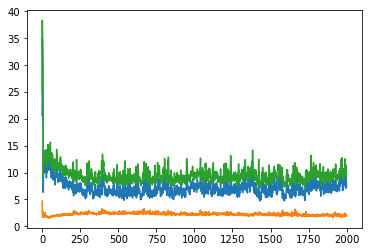

In [13]:
plt.plot(history.history['player_0_loss'])
plt.plot(history.history['player_1_loss'])
plt.plot(history.history['loss'])

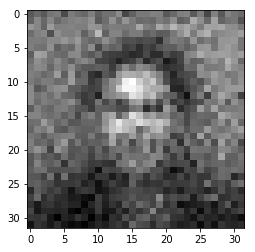

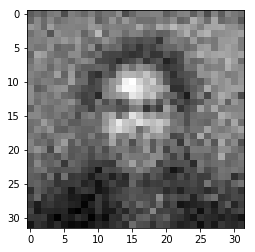

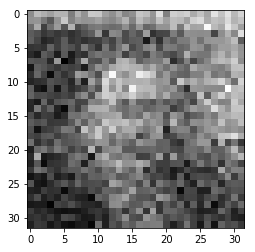

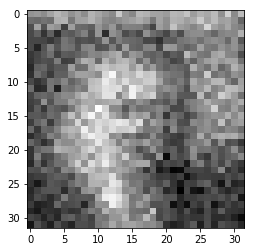

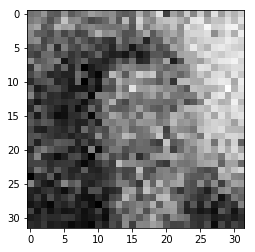

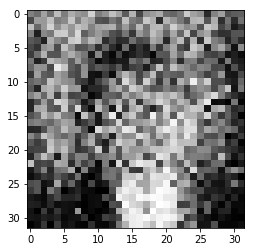

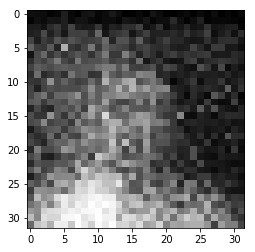

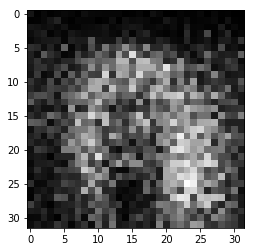

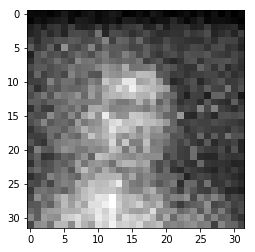

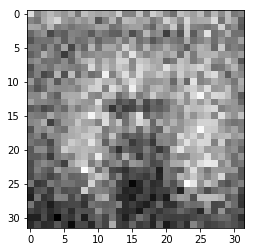

In [15]:
zsamples = np.random.normal(size=(10, 100))
pred = model_1.predict(zsamples)
for i in range(pred.shape[0]):
    plt.imshow(pred[i, :], cmap='gray')
    plt.show()

In [16]:
model_1.save_weights("../Models/LFW_GRAYSCALE_32_GAN/G_epoch_2000.hdf5")
model_2.save_weights("../Models/LFW_GRAYSCALE_32_GAN/D_epoch_2000.hdf5")